## Task 8: Тепловая карта (heatmap)
Несколько упражнений назад мы хотели выявить закономерности в поведении пользователей во время рабочих и выходных дней. В этом упражнении давайте выясним, существуют ли закономерности в поведении пользователей в разные дни недели и часы.

1. Анализируйте только пользователей, а не администраторов.
2. Используйте фильтр status = 'ready' для коммитов.
3. Разрешается выбрать цветовую палитру по своему вкусу для обоих графиков, которые вы построите в этом упражнении.
4. Используйте таблицу checker для вашего запроса.
5. Используйте абсолютные исходные, а не средние значения числа коммитов.
6. Отсортируйте датафреймы по общему числу коммитов, сделанных пользователем.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
conn = sqlite3.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [4]:
query = """
select uid, timestamp as commit_time
from checker
where status = 'ready'
and uid like "user_%"
"""
df = pd.io.sql.read_sql(query, conn, parse_dates = 'commit_time')
df.head()

,uid,commit_time
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:45.549397
2,user_4,2020-04-17 05:34:24.422370
3,user_4,2020-04-17 05:43:27.773992
4,user_4,2020-04-17 05:46:32.275104


In [5]:
df['hour'] = df['commit_time'].dt.hour
df['weekday'] = df['commit_time'].dt.day_name()

In [6]:
#группируем коммиты по дню недели
dd = df.groupby(by=['uid', 'weekday'], as_index=False)\
    .agg({'commit_time': 'count'})\
    .rename(columns={'commit_time': 'commits'})

In [7]:
dd = pd.pivot(dd, index='weekday', columns='uid', values='commits')
sm = dd.sum()
dd = dd[sm.sort_values(ascending=False).index] #отсортировал столбцы по сумме строк
days_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dd = dd.reindex(days_week).fillna(0) #отсортировал строки, и заменил NaN - 0
dd # датафрейм для графика пользователь/день недели(1 график)

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,18.0,25.0,12.0,8.0,4.0,0.0,12.0,3.0,0.0,23.0,...,4.0,6.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0
Tuesday,43.0,44.0,67.0,22.0,5.0,1.0,0.0,0.0,9.0,6.0,...,2.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0
Wednesday,17.0,0.0,16.0,8.0,0.0,17.0,4.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
Thursday,54.0,9.0,2.0,20.0,40.0,26.0,48.0,5.0,38.0,5.0,...,10.0,7.0,8.0,3.0,1.0,1.0,0.0,0.0,4.0,0.0
Friday,32.0,0.0,0.0,6.0,5.0,1.0,4.0,18.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,0.0,41.0,17.0,33.0,11.0,10.0,2.0,45.0,3.0,2.0,...,18.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
Sunday,24.0,13.0,7.0,23.0,26.0,35.0,16.0,4.0,1.0,5.0,...,0.0,16.0,15.0,11.0,5.0,1.0,5.0,0.0,0.0,0.0


In [8]:
#групируем коммиты по часу
dh = df.groupby(by=['uid', 'hour'], as_index=False)\
    .agg({'commit_time': 'count'})\
    .rename(columns={'commit_time': 'commits'})

In [9]:
dh = pd.pivot(dh, index='hour', columns='uid', values='commits')

In [10]:
dh = dh.append(pd.Series(name = 2))\
    .append(pd.Series(name = 4)) #добавил строку 2 и 4
dh


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,user_27,user_28,user_29,user_3,user_30,user_31,user_4,user_6,user_7,user_8
hour,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,2.0,NaN,NaN,10.0,2.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5.0,NaN,6.0,6.0,3.0,NaN,NaN,1.0,...,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,1.0,3.0
9,NaN,NaN,NaN,NaN,5.0,5.0,2.0,1.0,NaN,NaN,...,NaN,NaN,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,5.0,4.0,1.0,NaN,NaN,4.0,...,NaN,1.0,NaN,1.0,NaN,NaN,13.0,NaN,NaN,3.0


In [11]:
s = dh.sum()
dh = dh[s.sort_values(ascending=False).index] #отсортировал столбцы по сумме строк
dh = dh.sort_index().fillna(0) #отсортировал строки, и заменил NaN - 0
dh # датафрейм для графика пользователь/час(2 график)

,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,2.0,3.0,0.0,0.0,6.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,5.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Text(0.5, 1.0, 'uid/weekday')

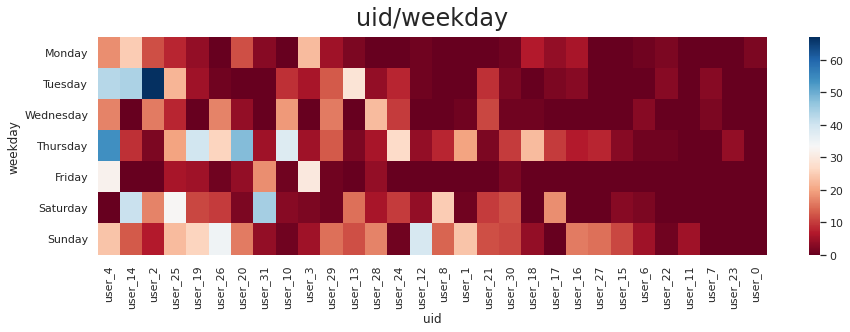

In [12]:
#строим график пользователь/день недели
sns.set_theme()
plt.figure(figsize=(15, 4))
plt.yticks(rotation = 0)
ax = sns.heatmap(dd, vmin=0, cmap='RdBu')
ax.set_title('uid/weekday', fontdict={'fontsize':24}, pad=12)


Text(0.5, 1.0, 'uid/hour')

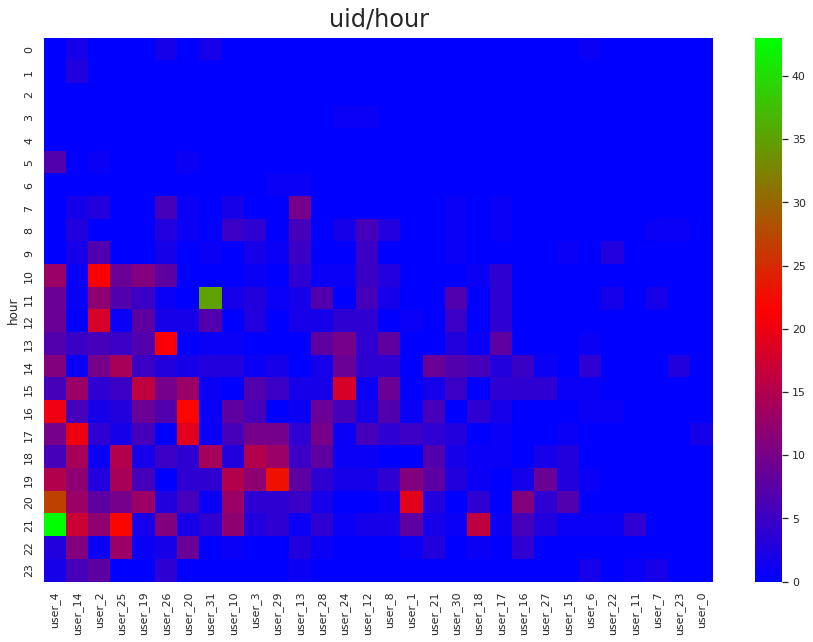

In [13]:
#строим график пользователь/час
sns.set_theme()
plt.figure(figsize=(15, 10))
plt.yticks(rotation = 0)
ax = sns.heatmap(dh, vmin=0, cmap='brg')
ax.set_title('uid/hour', fontdict={'fontsize':24}, pad=12)


7. В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопросы (ответьте на них, глядя только на графики):

- «У какого пользователя больше всего коммитов во вторник?». Ответ: user_2.
- «У какого пользователя больше всего коммитов в четверг?». Ответ: user_4.
- «В какой будний день пользователи не любят делать много коммитов?». Ответ: пятница.
- «Какой пользователь в каком часу сделал наибольшее количество коммитов?». Ответ: user_4, 21.

In [14]:
conn.close()